In [1]:
from ga_regression import *
from matplotlib import pyplot as plt
from functools import partial
import PIL
import matplotlib as mpl
from matplotlib.cm import ScalarMappable
from pvutils import iter_subplots
from pyvista import PolyData
import pyvista as pv
from scipy.stats import pearsonr

C:\Users\dg\.conda\envs\diffnet4\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# THE LINEAR LAYER STUFF
file = Path(r"D:\resynth\run_09_10\run00009_resynth\2025-08-22-13-48-14\opts_and_metadata.pt")
file = Path(r"D:\resynth\run_51_52\run00051_resynth\2025-08-23-12-28-45\opts_and_metadata.pt")
readers = Readers.from_file(file)

In [3]:
r = readers[1]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 881/881 [02:03<00:00,  7.12it/s]


array([<Axes: title={'center': 'Train (r = 0.61)'}, xlabel='Observed response', ylabel='Predicted response'>,
       <Axes: title={'center': 'Test (r = 0.44)'}, xlabel='Observed response'>],
      dtype=object)

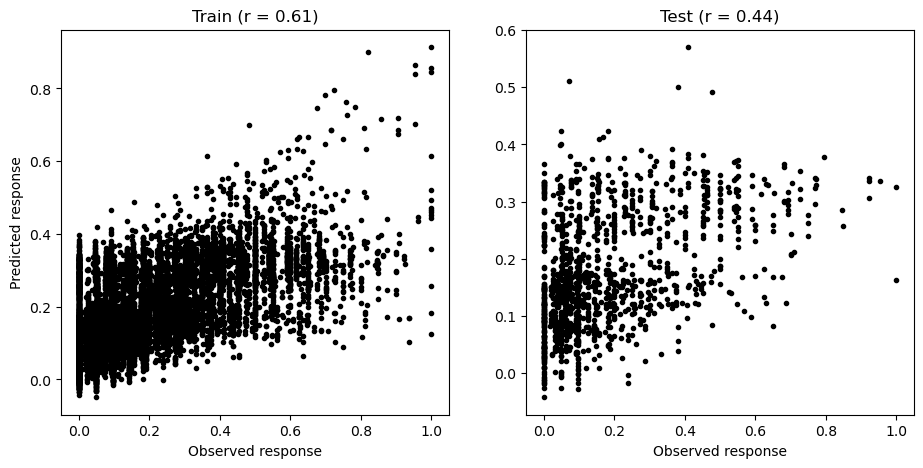

In [4]:
r.scatter_plot(last_trained=True)

In [5]:
sd = r.load_scatter_data(last_trained=True)

In [9]:
mse0 = ((sd.obs - sd.preds) ** 2).sum()

In [12]:
from scipy.stats import linregress
lr = linregress(sd.preds.reshape(-1), sd.obs.reshape(-1))
preds_prime = lr.intercept + lr.slope * sd.preds

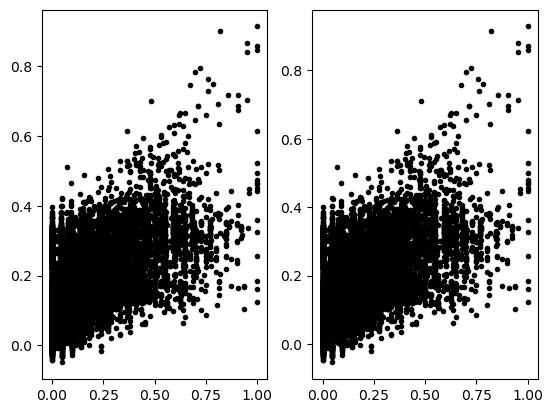

In [13]:
fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.plot(sd.obs.reshape(-1), sd.preds.reshape(-1), 'k.')
ax1.plot(sd.obs.reshape(-1), preds_prime.reshape(-1), 'k.')